In [18]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm as nm
from scipy import optimize
import matplotlib.pyplot as plt

# delta, gamma, vega, rho, theta
# gamma and vega same
# call and put
# sensitivty of a price with respect to parameters

In [19]:
# Read data - input is a file path and returns an array of the close values
def readFile(path):
    df = pd.read_csv(path)
    data = df["Close"]
    return data.to_numpy

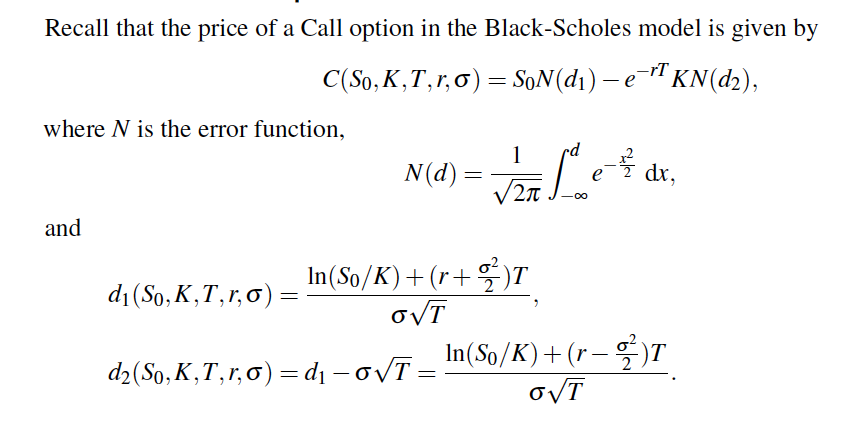

In [20]:
def callBS(K, s0, T, r, sigma):
    d = (lambda i: np.log(s0/K) +  (r - (-1)**i * (sigma**2)/2) * T) (sigma * math.sqrt(T))
    price = s0 * nm.cdf(d(1)) - np.exp(-r * T) * K * nm.cdf(d(2))
    return price

In [21]:
def putBS(K, s0, T, r, sigma):
    d = lambda i: (np.log(s0/K) + (T * (r - (-1)**i * (sigma**2/2))))/(sigma * np.sqrt(T))
    price = -s0 * nm.cdf(-d(1)) + K * np.exp(-r * T)* nm.cdf(-d(2))
    return price

In [28]:
def callGreeks(K, s0, T, r, sigma):
    d = (lambda i: np.log(s0/K) +  (r - (-1)**i * (sigma**2)/2) * T) (sigma * math.sqrt(T))
    deltaC = nm.cdf(d(1))
    gammaC = nm.pdf(d(1)) / (s0 * sigma * np.sqrt(T))
    thetaC = (- sigma * s0 * nm.pdf(d(1))) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * nm.cdf(d(2))
    vegaC = s0 * math.sqrt(T) * nm.pdf(d(1))
    
    call = np.array([deltaC, gammaC, thetaC, vegaC])
    print(call)
    
    return call

In [ ]:
def putGreeks(K, s0, T, r, sigma):
    d = (lambda i: np.log(s0/K) +  (r - (-1)**i * (sigma**2)/2) * T) (sigma * math.sqrt(T))
    deltaP = nm.cdf(d(1)) - 1
    gammaP = nm.pdf(d(1)) / (s0 * sigma * np.sqrt(T))
    thetaP = -((s0 * nm.pdf(d(1)) * sigma) / (2 * np.sqrt(T))) + r * K * np.exp(-r * T) * nm.cdf(-d(2))
    vegaP = s0 * math.sqrt(T) * nm.pdf(d(1))
    
    put = np.array([deltaP, gammaP, thetaP, vegaP])
    
    return put

In [24]:
def impliedVol(opPrice, s0, K, r, T):
    def formula(sigma):
        return putBS(sigma, s0, K, r, T) - opPrice
    
    impliedVol = optimize.brentq(formula, 0, 5, xtol = 1.0e-6)
    return impliedVol

In [29]:
K = 50
r = 0.02
T = 0.25
sigma = 0.2

s0 = np.arange(35, 65, 0.5)
callG = []
putG = []

for value in s0:
    temp = callGreeks(K, value, T, r, sigma)
    print(temp)
    callG.append(callGreeks(K, value, T, r, sigma))
    putG.append(putGreeks(K, value, T, r, sigma))
    
print(type(callG))
    
# compare deltas of call and put
'''
plt.plot(s0, , marker='o')
plt.grid(True)
plt.xlabel("Strike Price ($)")
plt.ylabel("Implied Volatility")
plt.title("Implied Volatility vs Strike Price") '''

TypeError: 'numpy.complex128' object is not callable